# Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.


In [6]:
from scipy import stats

x = 50
sigma = 5

alpha = 0.05 

cv = stats.t.ppf( 1 - alpha / 2 ,df = 99 ) #assuming sample size to be 100 as its not given

moe = cv * sigma/ 100**(1/2)

ci = (x - moe , x + moe)

print('95% confidence interval: ',ci)



95% confidence interval:  (49.00789152424566, 50.99210847575434)


Interpretation

This means that we can be 95% confident that the true population mean lies within the range of 49.0 to 50.99 based on the sample data with a mean of 50 and a standard deviation of 5. The interval provides a measure of uncertainty around the sample mean, indicating that the true population mean is likely to fall within this range. The wider the confidence interval, the more uncertainty there is in our estimate, while a narrower interval indicates a more precise estimate. With a 95% confidence level, we are allowing for a smaller margin of error compared to, for example, a 90% confidence level.

# Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

In [10]:
import numpy as np

observed = np.array([25, 18, 20, 12, 10, 15])

expected = np.array([0.2,0.2,0.2,0.1,0.1,0.2]) * np.sum(observed)

chi_square, p_value = stats.chisquare(f_obs = observed,f_exp = expected)

alpha = 0.05

print("Chi-square statistic:", chi_square)
print("p-value: %.2f" %p_value)


if p_value < alpha:
    print("The distribution of colors of M&Ms in the bag does not match the expected distribution.")
else:
    print("The distribution of colors of M&Ms in the bag matches the expected distribution.")



Chi-square statistic: 3.1
p-value: 0.68
The distribution of colors of M&Ms in the bag matches the expected distribution.


Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following
data:

Interpret the results of the test.

    Group A Group B 

- Outcome 1 20 15 
- Outcome 2 10 25
- Outcome 3 15 20

In [15]:


data = np.array([[20,15],
                [10,25],
                [15,20]])


cchi_square, p_value, dof, expected = stats.chi2_contingency(data)

alpha = 0.05


print("Chi-square statistic:", chi_square)
print("p-value: %.4f"% p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


if p_value < alpha:
    print("The test is statistically significant, and there is evidence of a relationship between the groups and outcomes.")
else:
    print("The test is not statistically significant, and there is no evidence of a relationship between the groups and outcomes.")

Chi-square statistic: 3.1
p-value: 0.0541
Degrees of freedom: 2
Expected frequencies table:
[[15. 20.]
 [15. 20.]
 [15. 20.]]
The test is not statistically significant, and there is no evidence of a relationship between the groups and outcomes.


Interpretation

Since the p-value (0.0541) is greater than the chosen significance level of 0.05, we fail to reject the null hypothesis. This means that we do not have sufficient evidence to conclude that there is a significant association between the groups (Group A and Group B) and the outcomes (Outcome 1, Outcome 2, and Outcome 3). In other words, the data does not provide strong evidence to suggest that the proportions of outcomes differ significantly between the two groups. 

The test results indicate that the observed differences between the groups and outcomes could be due to random chance rather than a true association. However, it is important to note that the p-value is close to the significance level, so there may be some weak evidence of an association that requires further investigation with a larger sample size or more data.

# Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [21]:

p = 60/500

alpha = 0.05

cv = stats.t.ppf(1-alpha/2,60-1)

se = ((p* (1-p))/500)**(1/2)

print('95%% Confidence Interval : %.3f , %.3f '%(p - cv*se , p+ cv*se))


95% Confidence Interval : 0.091 , 0.149 


# Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [24]:

n = 25 # Assume sample size as 25 as its not given in the question

x = 75

sigma = 12

alpha = 0.10

cv = stats.t.ppf(1-alpha/2,df = n-1)

moe = cv * sigma/(n**(1/2))

print('95%% Confidence Interval : %.3f , %.3f '%(x - moe , x+ moe))



95% Confidence Interval : 70.894 , 79.106 


Interpretation:

This means that we can be 90% confident that the true population mean lies within the range of 70.89 to 79.10 based on the sample data with a mean of 75 and a sample standard deviation of 12. The interval provides a measure of uncertainty around the sample mean, indicating that the true population mean is likely to fall within this range. The wider the confidence interval, the more uncertainty there is in our estimate, while a narrower interval indicates a more precise estimate.



# Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.



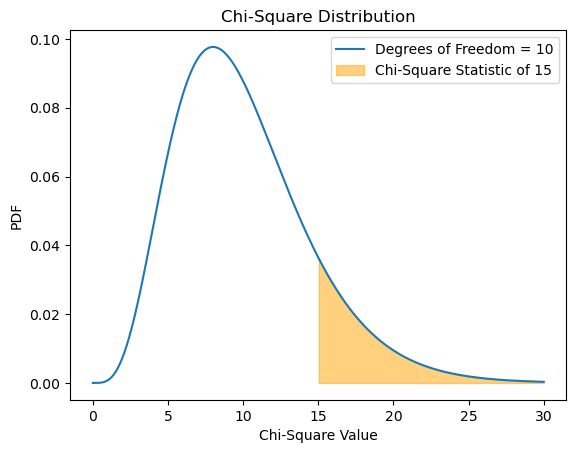

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
df = 10

x = np.linspace(0,30,500)

chi_square_pdf = stats.chi2.pdf(x,df)

plt.plot(x,chi_square_pdf,label=f'Degrees of Freedom = {df}')
plt.xlabel('Chi-Square Value')
plt.ylabel('PDF')
plt.title('Chi-Square Distribution')



mask = x >= 15
plt.fill_between(x,chi_square_pdf,where=mask,alpha=0.5,color='orange',label="Chi-Square Statistic of 15")

plt.legend()
plt.show()

# Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.



In [7]:
n = 1000

p = 520 / n

alpha = 0.01

cv = stats.norm.ppf( 1 - alpha/2)

se = np.sqrt((p*(1-p)/n))

moe = cv * se

print('99%% Confidence Interval : %.3f , %.3f '%(p - moe , p+ moe))

99% Confidence Interval : 0.479 , 0.561 


# Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

In [8]:


observed = np.array([45,100-45])
expected = np.array([50,50])

chi_square, p_value = stats.chisquare(f_obs=observed, f_exp=expected)


alpha = 0.05


print("Chi-square statistic:", chi_square)
print("p-value: %.2f"% p_value)


if p_value < alpha:
    print("The observed frequencies do not match the expected frequencies of a fair coin.")
else:
    print("The observed frequencies match the expected frequencies of a fair coin.")


Chi-square statistic: 1.0
p-value: 0.32
The observed frequencies match the expected frequencies of a fair coin.



# Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis.

Use a significance level of 0.05.

    Lung Cancer: Yes Lung Cancer: No

- Smoker 60 140
- Non-smoker 30 170


In [12]:
observed = np.array([[60,140],[30,170]])

chi_square, p_value, dof, expected = stats.chi2_contingency(observed)

alpha = 0.05

print("Chi-square statistic: %.4f"% chi_square)
print("p-value: %.4f"% p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

if p_value < alpha:
    print("There is a significant association between smoking status and lung cancer diagnosis.")
else:
    print("There is no significant association between smoking status and lung cancer diagnosis.")


Chi-square statistic: 12.0573
p-value: 0.0005
Degrees of freedom: 1
Expected frequencies:
[[ 45. 155.]
 [ 45. 155.]]
There is a significant association between smoking status and lung cancer diagnosis.


# Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.

Use a significance level of 0.01.

    Milk Chocolate Dark Chocolate White Chocolate
- US(n=500) 200 150 150
- UK(n=500) 225 175 100


In [25]:
observed = np.array([[200,150,150],[225,175,100]])

chi_square, p_value, dof, expected = stats.chi2_contingency(observed)

alpha = 0.01

print("Chi-square statistic: %.4f"% chi_square)
print("p-value: %.4f"%p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


if p_value < alpha:
    print("There is a significant association between chocolate preference and country of origin.")
else:
    print("There is no significant association between chocolate preference and country of origin.")

Chi-square statistic: 13.3937
p-value: 0.0012
Degrees of freedom: 2
Expected frequencies:
[[212.5 162.5 125. ]
 [212.5 162.5 125. ]]
There is a significant association between chocolate preference and country of origin.


# Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

In [28]:
n = 30
x = 72
sigma = 10

mu = 70

alpha = 0.05

t_value = (x - mu) / (sigma/np.sqrt(n))

cv = stats.t.ppf(1-alpha/2,n-1)


print('T value: %.3f \t Critical Value : %.3f'%(t_value,cv))

if t_value < cv:
    print("There is no significant evidence to suggest that the population mean is different from 70")
else:
    print("There is significant evidence to suggest that the population mean is different from 70")



T value: 1.095 	 Critical Value : 2.045
There is no significant evidence to suggest that the population mean is different from 70
